# Import and run packages

In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib 



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report  


## Import and clean datasets

# Import and clean events dataset

In [2]:
events = pd.read_csv("C:/Users/Hp/Downloads/OneDrive_2_2-18-2025/TMP2/events.csv") # import events dataset

In [3]:
events.head()  # Shows first 5 rows


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [4]:
events.info()  # Displays column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [5]:
events.isnull().sum()  # Counts missing values per column

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

In [6]:
# Transactionid column contains 2,733,644 empty rows

In [7]:
# fill empty rows in transactionid column with "no transaction" 

In [8]:
events['transactionid'] = events['transactionid'].fillna("no transaction")
print(events)

             timestamp  visitorid event  itemid   transactionid
0        1433221332117     257597  view  355908  no transaction
1        1433224214164     992329  view  248676  no transaction
2        1433221999827     111016  view  318965  no transaction
3        1433221955914     483717  view  253185  no transaction
4        1433221337106     951259  view  367447  no transaction
...                ...        ...   ...     ...             ...
2756096  1438398785939     591435  view  261427  no transaction
2756097  1438399813142     762376  view  115946  no transaction
2756098  1438397820527    1251746  view   78144  no transaction
2756099  1438398530703    1184451  view  283392  no transaction
2756100  1438400163914     199536  view  152913  no transaction

[2756101 rows x 5 columns]


In [9]:
events.duplicated().sum()  #find and remove duplicates

np.int64(460)

In [10]:
# 460 duplicates found in the events dataset
# drop duplicates

In [11]:
events = events.drop_duplicates()

In [12]:
events.duplicated().sum()           #preview

np.int64(0)

In [13]:
# converting timestamp column from int64 to datetime

In [14]:
# converting timestamp column from int64 to datetime 
events["timestamp"] = pd.to_datetime(events["timestamp"], unit="ms")

In [15]:
# Remove microseconds (set them to 0)
events["timestamp"] = events["timestamp"].dt.floor('s')

In [16]:
events.head() # preview

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12,257597,view,355908,no transaction
1,2015-06-02 05:50:14,992329,view,248676,no transaction
2,2015-06-02 05:13:19,111016,view,318965,no transaction
3,2015-06-02 05:12:35,483717,view,253185,no transaction
4,2015-06-02 05:02:17,951259,view,367447,no transaction


In [17]:
# Detect and handle outliers

In [18]:
Q1 = events["itemid"].quantile(0.25)  # checking outliers for itemid column
Q3 = events["itemid"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = events[(events["itemid"] < lower_bound) | (events["itemid"] > upper_bound)]


In [19]:
print(outliers) # shows no outliers for the events dataset

Empty DataFrame
Columns: [timestamp, visitorid, event, itemid, transactionid]
Index: []


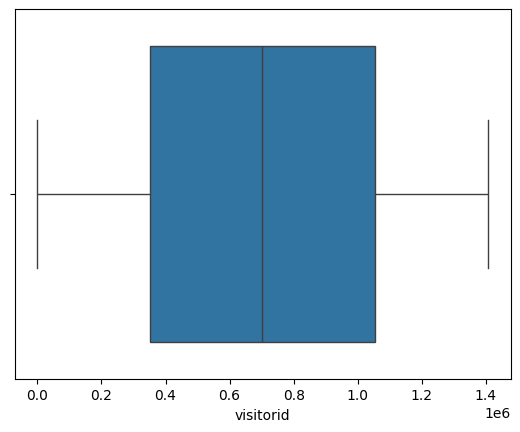

In [20]:
# Example: Box plot for visitorid column
sns.boxplot(x=events['visitorid'])
plt.show()

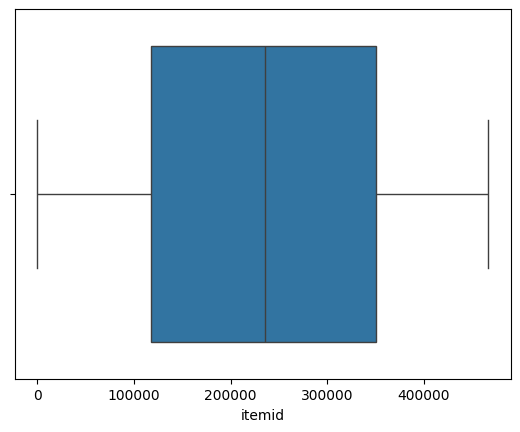

In [21]:
sns.boxplot(x=events['itemid'])         # identifying outliers
plt.show()                                 # no outliers seen

# Cleaning the Category dataset

In [22]:
category = pd.read_csv("C:/Users/Hp/Downloads/OneDrive_2_2-18-2025/TMP2/category_tree.csv")

In [23]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [24]:
category.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [25]:
category.isnull().sum()                    #Counts missing values per column

categoryid     0
parentid      25
dtype: int64

In [26]:
category = category.dropna()                # drop 25 empty rows from the parentid column

In [27]:
    # REMOVE DUPLICATE

In [28]:
category.duplicated().sum()                # no duplicates seen in the category dataset

np.int64(0)

In [29]:
    #REMOVE OUTLIERS

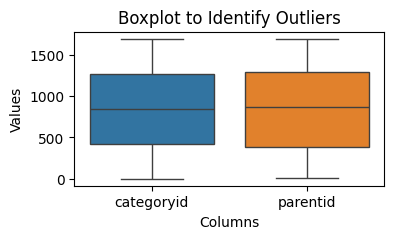

In [30]:
# Set up the figure and axis
plt.figure(figsize=(4, 2))

# Create a boxplot for the 4 columns
sns.boxplot(data=category[['categoryid', 'parentid']])

# Add titles and labels
plt.title('Boxplot to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()                                                     # no outliers seen

# Import and clean properties1 dataset

In [31]:
properties1 = pd.read_csv("C:/Users/Hp/Downloads/OneDrive_2_2-18-2025/TMP2/item_properties_part1.1.csv")

In [32]:
properties1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


In [33]:
properties1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [34]:
properties1.tail()

,timestamp,itemid,property,value
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566
10999998,1436065200000,464846,790,n410640.000


In [35]:
  # converting timestamp column from intt64 to datetime datatype

In [36]:
 properties1["timestamp"] = pd.to_datetime( properties1["timestamp"], unit="ms")

In [37]:
 properties1["timestamp"] =  properties1["timestamp"].dt.floor("s")

In [38]:
properties1.head()

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


In [39]:
properties1.info()                           # preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   itemid     int64         
 2   property   object        
 3   value      object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 335.7+ MB


In [40]:
# View the 'property' column 
properties1.loc[0:20, 'property']

0     categoryid
1            888
2            400
3            790
4            917
5      available
6            213
7              6
8            202
9            451
10           888
11           400
12           227
13           839
14           790
15     available
16           790
17           888
18             0
19          1022
20           566
Name: property, dtype: object

In [41]:
    # fix the 'property' column 

In [42]:
# Convert 'property' column to numeric, setting errors='coerce' to turn non-numeric values into NaN
properties1["property"] = pd.to_numeric(properties1["property"], errors="coerce")

In [43]:
# Drop rows where 'property' is NaN
properties1 = properties1.dropna(subset=["property"])

In [44]:
# Convert 'property' 
properties1["property"] = properties1["property"].astype(int)

In [45]:
# Display cleaned data frame
print(properties1.head())

            timestamp  itemid  property                            value
1 2015-09-06 03:00:00  206783       888          1116713 960601 n277.200
2 2015-08-09 03:00:00  395014       400  n552.000 639502 n720.000 424566
3 2015-05-10 03:00:00   59481       790                       n15360.000
4 2015-05-17 03:00:00  156781       917                           828513
6 2015-06-14 03:00:00   89534       213                          1121373


    #Cleaning the value column

In [46]:
properties1.loc[0:5, 'value']

1            1116713 960601 n277.200
2    n552.000 639502 n720.000 424566
3                         n15360.000
4                             828513
Name: value, dtype: object

In [47]:
# Remove non-numeric characters
properties1["value"] = properties1["value"].str.replace(r"[^\d.]", "", regex=True)

In [48]:
# Convert to numeric
properties1["value"] = pd.to_numeric(properties1["value"], errors="coerce")

In [49]:
# Drop any rows where 'value' became NaN 
properties1 = properties1.dropna(subset=["value"])

In [50]:
# Display cleaned dataset
print(properties1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9343018 entries, 1 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   itemid     int64         
 2   property   int64         
 3   value      float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 356.4 MB
None


In [51]:
   properties1.isnull().sum()          # Checking for null values
                                       # no empty rows detected

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [52]:
 properties1.duplicated().sum()             # checking for duplicates
                                            # no duplicates seen

np.int64(0)

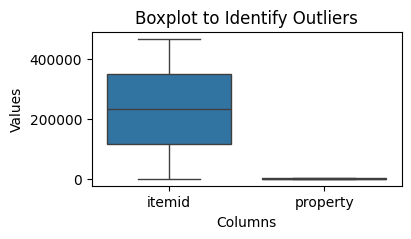

In [53]:
# Set up the figure and axis
plt.figure(figsize=(4, 2))

# Create a boxplot for the int columns
sns.boxplot(data=properties1[['itemid', 'property']])

# Add titles and labels
plt.title('Boxplot to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()                                      # no outliers seen

In [ ]:
    # converted the data type of timestamp column from int64 to date time
    # converted the data type of property column from obj to numeric
    # converted the non-numreic values of property column to NaN
    # dropped non-numeric values from the property column
    # dropped null values from the property dataset
    # checked and removed duplicates
    # removed outliers

 # cleaning Properties2 dataset

In [54]:
properties2 = pd.read_csv("C:/Users/Hp/Downloads/OneDrive_2_2-18-2025/TMP2/item_properties_part2.csv")

In [55]:
properties2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


In [56]:
properties2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [57]:
    # fix timestamp column
    # convert time stamp column from int64 to date time
properties2["timestamp"] = pd.to_datetime(properties2["timestamp"], unit="ms")

In [58]:
properties2["timestamp"] = properties2["timestamp"].dt.floor("s")

In [59]:
properties2.head()

,timestamp,itemid,property,value
0,2015-05-31 03:00:00,183478,561,769062
1,2015-08-16 03:00:00,132256,976,n26.400 1135780
2,2015-06-28 03:00:00,420307,921,1149317 1257525
3,2015-05-17 03:00:00,403324,917,1204143
4,2015-06-28 03:00:00,230701,521,769062


In [60]:
    # fix the property column

In [61]:
# View the 'property' column 
properties2.loc[0:20, 'property']

0            561
1            976
2            921
3            917
4            521
5            202
6            888
7            888
8            888
9             71
10           202
11           202
12           663
13            71
14           283
15    categoryid
16           888
17           575
18           283
19           544
20            28
Name: property, dtype: object

In [62]:
# Convert 'property' column to numeric, setting errors='coerce' to turn non-numeric values into NaN
properties2["property"] = pd.to_numeric(properties2["property"], errors="coerce")

In [63]:
# Drop rows where 'property' is NaN
properties2 = properties2.dropna(subset=["property"])

In [64]:
# Drop rows where 'property' is NaN
properties2 = properties2.dropna(subset=["property"])

In [65]:
# Convert 'property' 
properties2["property"] = properties2["property"].astype(int)

In [66]:
    # preview dataset
properties2.head()

,timestamp,itemid,property,value
0,2015-05-31 03:00:00,183478,561,769062
1,2015-08-16 03:00:00,132256,976,n26.400 1135780
2,2015-06-28 03:00:00,420307,921,1149317 1257525
3,2015-05-17 03:00:00,403324,917,1204143
4,2015-06-28 03:00:00,230701,521,769062


In [67]:
    # cleaning the values column
    # View the 'value' column 
properties2.loc[0:5, 'value']

0             769062
1    n26.400 1135780
2    1149317 1257525
3            1204143
4             769062
5             820407
Name: value, dtype: object

In [68]:
# Remove non-numeric characters (assuming 'n' is the only unwanted character)
properties2["value"] = properties2["value"].str.replace(r"[^\d.]", "", regex=True)

In [69]:
# Convert to numeric
properties2["value"] = pd.to_numeric(properties2["value"], errors="coerce")

In [70]:
# Drop any rows where 'value' became NaN due to invalid data
properties2 = properties2.dropna(subset=["value"])

In [71]:
# Display cleaned dataset
print(properties2.head())

            timestamp  itemid  property         value
0 2015-05-31 03:00:00  183478       561  7.690620e+05
1 2015-08-16 03:00:00  132256       976  2.640011e+01
2 2015-06-28 03:00:00  420307       921  1.149317e+13
3 2015-05-17 03:00:00  403324       917  1.204143e+06
4 2015-06-28 03:00:00  230701       521  7.690620e+05


In [72]:
    # detect and remove duplicates

In [73]:
properties2.duplicated().sum()         # no duplicates found

np.int64(0)

In [74]:
properties2.head()

,timestamp,itemid,property,value
0,2015-05-31 03:00:00,183478,561,7.690620e+05
1,2015-08-16 03:00:00,132256,976,2.640011e+01
2,2015-06-28 03:00:00,420307,921,1.149317e+13
3,2015-05-17 03:00:00,403324,917,1.204143e+06
4,2015-06-28 03:00:00,230701,521,7.690620e+05


# Analysis and problem solving

In [75]:
# identifying unique values in events dataset
# Get the count of unique values in each column
unique_events = events.nunique()
print(unique_events)

timestamp        2357232
visitorid        1407580
event                  3
itemid            235061
transactionid      17673
dtype: int64


In [76]:
# identifying unique values in category dataset
# Get the count of unique values in each column
unique_category = category.nunique()
print(unique_category)

categoryid    1644
parentid       362
dtype: int64


In [77]:
# identifying unique values in properties1 dataset
# Get the count of unique values in each column
unique_properties1 = properties1.nunique()
print(unique_properties1)

timestamp         18
itemid        417053
property        1088
value        1034833
dtype: int64


In [78]:
# identifying unique values in properties1 dataset
# Get the count of unique values in each column
unique_properties2 = properties2.nunique()
print(unique_properties2)

timestamp        18
itemid       417050
property       1085
value        909240
dtype: int64


In [79]:
# Extract unique categories from the value column
unique_events = events['event'].unique()

# Display the distinct categories
print(unique_events)

['view' 'addtocart' 'transaction']


# Answering business questions 

# 1. what is the most occuring events in the website

In [80]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2755641 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 126.1+ MB


In [82]:
events = pd.read_csv("C:/Users/Hp/Downloads/OneDrive_2_2-18-2025/TMP2/events.csv")  #call out the events dataset


In [84]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [85]:
events_category = events['event'].value_counts()  # call out evevnt column


In [87]:
events_category.head()

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

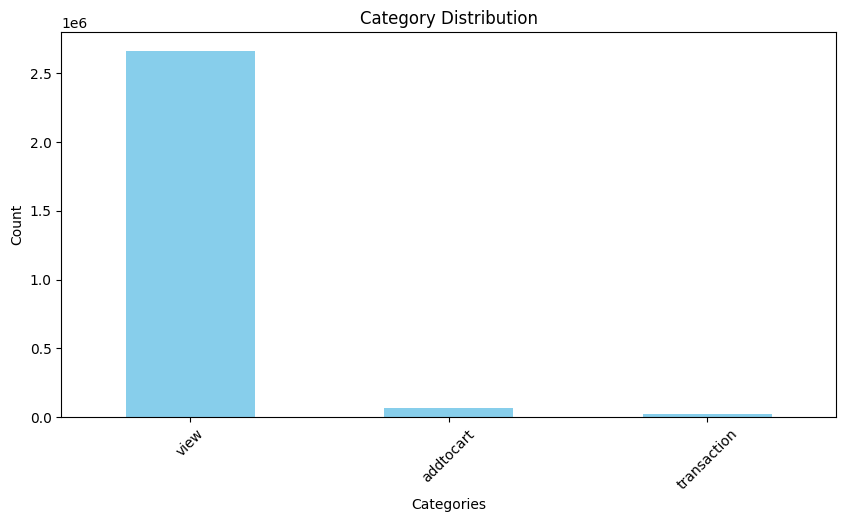

In [88]:
plt.figure(figsize=(10,5))  # Set figure size
events_category.plot(kind='bar', color='skyblue')  # Create bar chart
plt.xlabel("Categories")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Category Distribution")  # Title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()  # Display the chart


In [ ]:
# 2. What are the most frequently purchased products across different customer segments?